## Domain:
Automobile

## Context:
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

## Objective:
Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

## Data Description:
The data concerns city-cycle fuel consumption in miles per gallon Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

## 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Reading Data

In [2]:
df = pd.read_csv('car-mpg.csv')

In [3]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Data Analysis and EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.shape

(398, 9)

In [6]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398.0,NaN,NaN,NaN,23.514573,7.815984,9.0,17.5,23.0,29.0,46.6
cyl,398.0,NaN,NaN,NaN,5.454774,1.701004,3.0,4.0,4.0,8.0,8.0
disp,398.0,NaN,NaN,NaN,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398.0,NaN,NaN,NaN,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0
acc,398.0,NaN,NaN,NaN,15.56809,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,NaN,NaN,NaN,76.01005,3.697627,70.0,73.0,76.0,79.0,82.0
origin,398.0,NaN,NaN,NaN,1.572864,0.802055,1.0,1.0,1.0,2.0,3.0
car_name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 8 attributes and 1 target feature that is mpg.
- There are total 398 instances which is quite less.
- 'mpg' is a continuous feature and has mean value 23.52.
- 'mpg', 'disp', 'wt', 'acc' and 'hp' are continuous in nature. Howver, 'hp' has datatye as object so it could have some invalid values in it.
- 'cyl', 'yr', and 'origin' are discrete in nature.
- 'car_name' is a string feature and has ~ 305 unique values. 

In [8]:
#checking missing values
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

There are no null values

In [9]:
#nunique(): This function is used to count the number of unique elements in a Series
df.nunique()

mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
car_name    305
dtype: int64

- There are three decrete features and we will check their frequency

In [10]:
df['cyl'].value_counts()

cyl
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

- Frquency for number of cylenders is quite imbalanced. Most of the cars have either 4 or 8 cylender. A very few of them have 3 or 5.

In [11]:
df['yr'].value_counts()

yr
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [12]:
df['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [13]:
#unique(): This function is used to get the unique elements from a Series (a single column in a DataFrame) or a DataFrame.
df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

- we have '?' in our data 

In [14]:
#count of '?' in the hp column
(df['hp'] == '?').sum()   

6

In [15]:
#checking for "?" in other cloumns
cols=df.columns
for i in cols:
  print(i,sep="-->",end=" ")
  print((df[i]=="?").sum())

mpg 0
cyl 0
disp 0
hp 6
wt 0
acc 0
yr 0
origin 0
car_name 0


In [16]:
#checking for which car we have "?"
df[df["hp"]=="?"].car_name

32               ford pinto
126           ford maverick
330    renault lecar deluxe
336      ford mustang cobra
354             renault 18i
374          amc concord dl
Name: car_name, dtype: object

In [17]:
# creating car_brand column
df=df.assign(brand=df.car_name.str.partition()[0])

In [18]:
df.brand.value_counts()

brand
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

In [19]:
#some brand names are same with wrong spellings 
df['brand'].replace('chevy','chevrolet',inplace=True) 
df['brand'].replace('chevroelt','chevrolet',inplace=True)
df['brand'].replace('toyouta','toyota',inplace=True)
df['brand'].replace('vw','volkswagen',inplace=True)
df['brand'].replace('vokswagen','volkswagen',inplace=True)
df['brand'].replace('maxda','mazda',inplace=True)
df['brand'].replace('mercedes','mercedes-benz',inplace=True)
df.brand.value_counts()

brand
ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
capri             1
hi                1
triumph           1
nissan            1
Name: count, dtype: int64

In [20]:
from scipy.stats import mode
#mode for entire hp column
(df['hp']).mode()

0    150
Name: hp, dtype: object

In [21]:
#checking for which car we have "?"
df[df["hp"]=="?"].brand

32        ford
126       ford
330    renault
336       ford
354    renault
374        amc
Name: brand, dtype: object

In [22]:
# replacing '?' with the mode of the column (if we want we can make the ? based on car brand)
df.replace(['?'], df['hp'].mode()[0],inplace = True)

In [23]:
(df['hp'] == '?').sum()    

0

In [24]:
# checking the data type
df['hp'].dtypes

dtype('O')

In [25]:
#converting the object data type to int
df['hp'] = df['hp'].astype("int64")

In [26]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
brand        object
dtype: object

In [27]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398.0,NaN,NaN,NaN,23.514573,7.815984,9.0,17.5,23.0,29.0,46.6
cyl,398.0,NaN,NaN,NaN,5.454774,1.701004,3.0,4.0,4.0,8.0,8.0
disp,398.0,NaN,NaN,NaN,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0
hp,398.0,NaN,NaN,NaN,105.155779,38.600986,46.0,76.0,95.0,130.0,230.0
wt,398.0,NaN,NaN,NaN,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0
acc,398.0,NaN,NaN,NaN,15.56809,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,NaN,NaN,NaN,76.01005,3.697627,70.0,73.0,76.0,79.0,82.0
origin,398.0,NaN,NaN,NaN,1.572864,0.802055,1.0,1.0,1.0,2.0,3.0
car_name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,398,30,ford,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## visualization techniques to derive insights and from the data

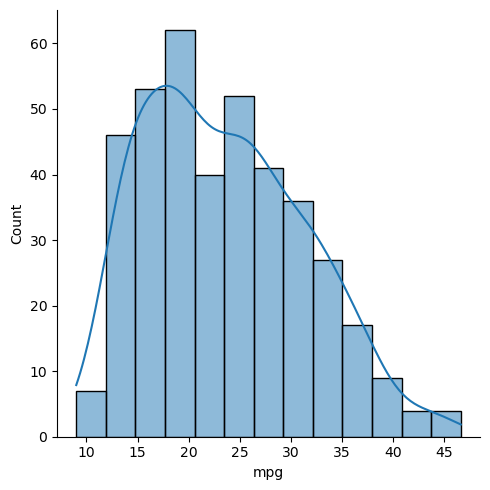

In [28]:
sns.displot(df['mpg'],kde=True)

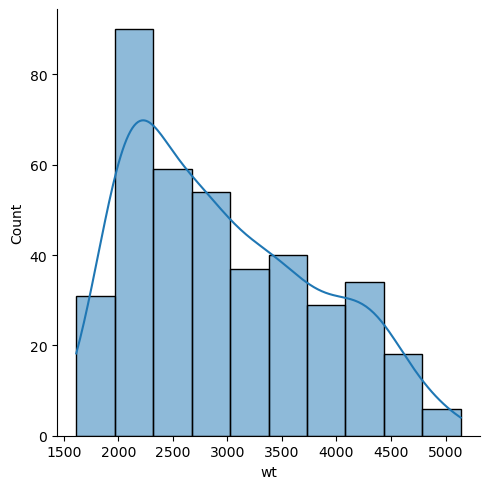

In [29]:
sns.displot(df['wt'],kde=True)

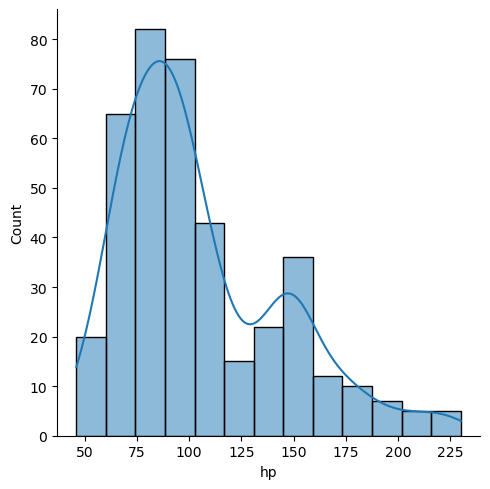

In [30]:
sns.displot(df['hp'],kde=True)

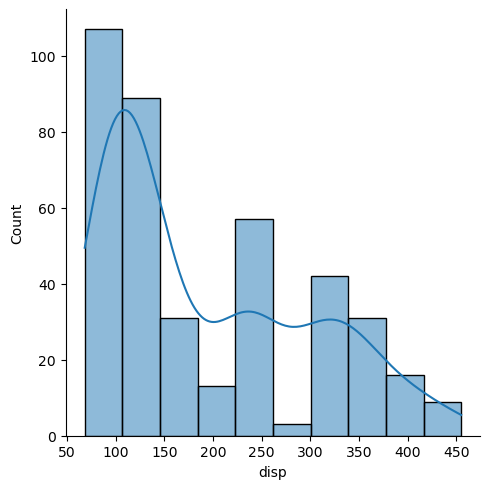

In [31]:
sns.displot(df['disp'],kde=True)

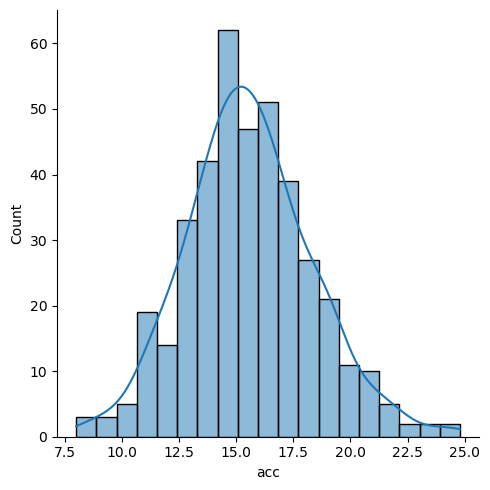

In [32]:
sns.displot(df['acc'],kde=True)

<Axes: xlabel='cyl', ylabel='count'>

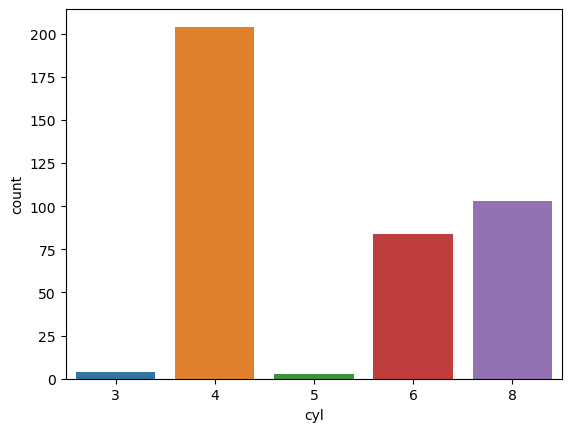

In [33]:
sns.countplot(data=df, x='cyl')

<Axes: xlabel='yr', ylabel='count'>

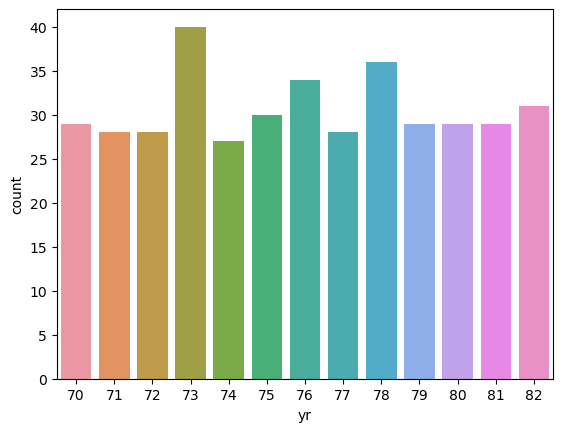

In [34]:
sns.countplot(data=df, x='yr')

<Axes: xlabel='origin', ylabel='count'>

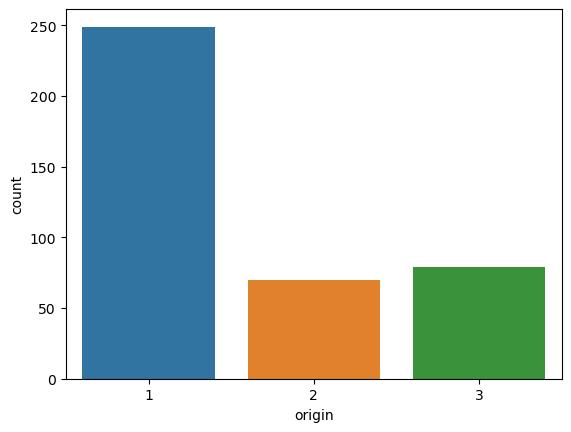

In [35]:
sns.countplot(data=df, x='origin')

In [36]:
# correlation in the data. Ploting heatmap to visualize correlation between different variables.
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.454271
wt,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,1.000000


<Axes: >

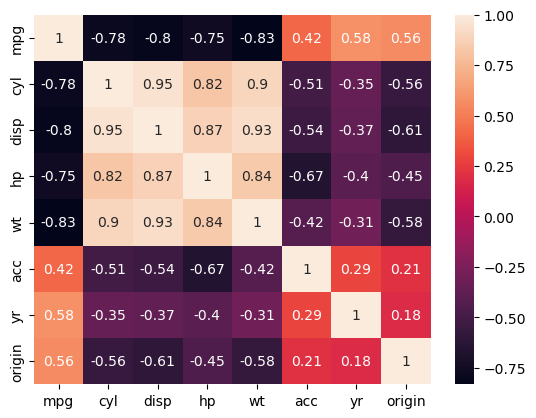

In [37]:
sns.heatmap(numeric_df.corr(),annot=True)

 - We can see high correlation between a few variables like -
     - Cyl and mpg
     - disp and mpg
     - hp and mpg
     - wt and mpg
     - Cyl and disp
     - Cyl and hp
     - cyl and wt
     - Disp and hp
     - Disp and wt
     
- Acc, yr, and origin have less correlation with target and other independent features    

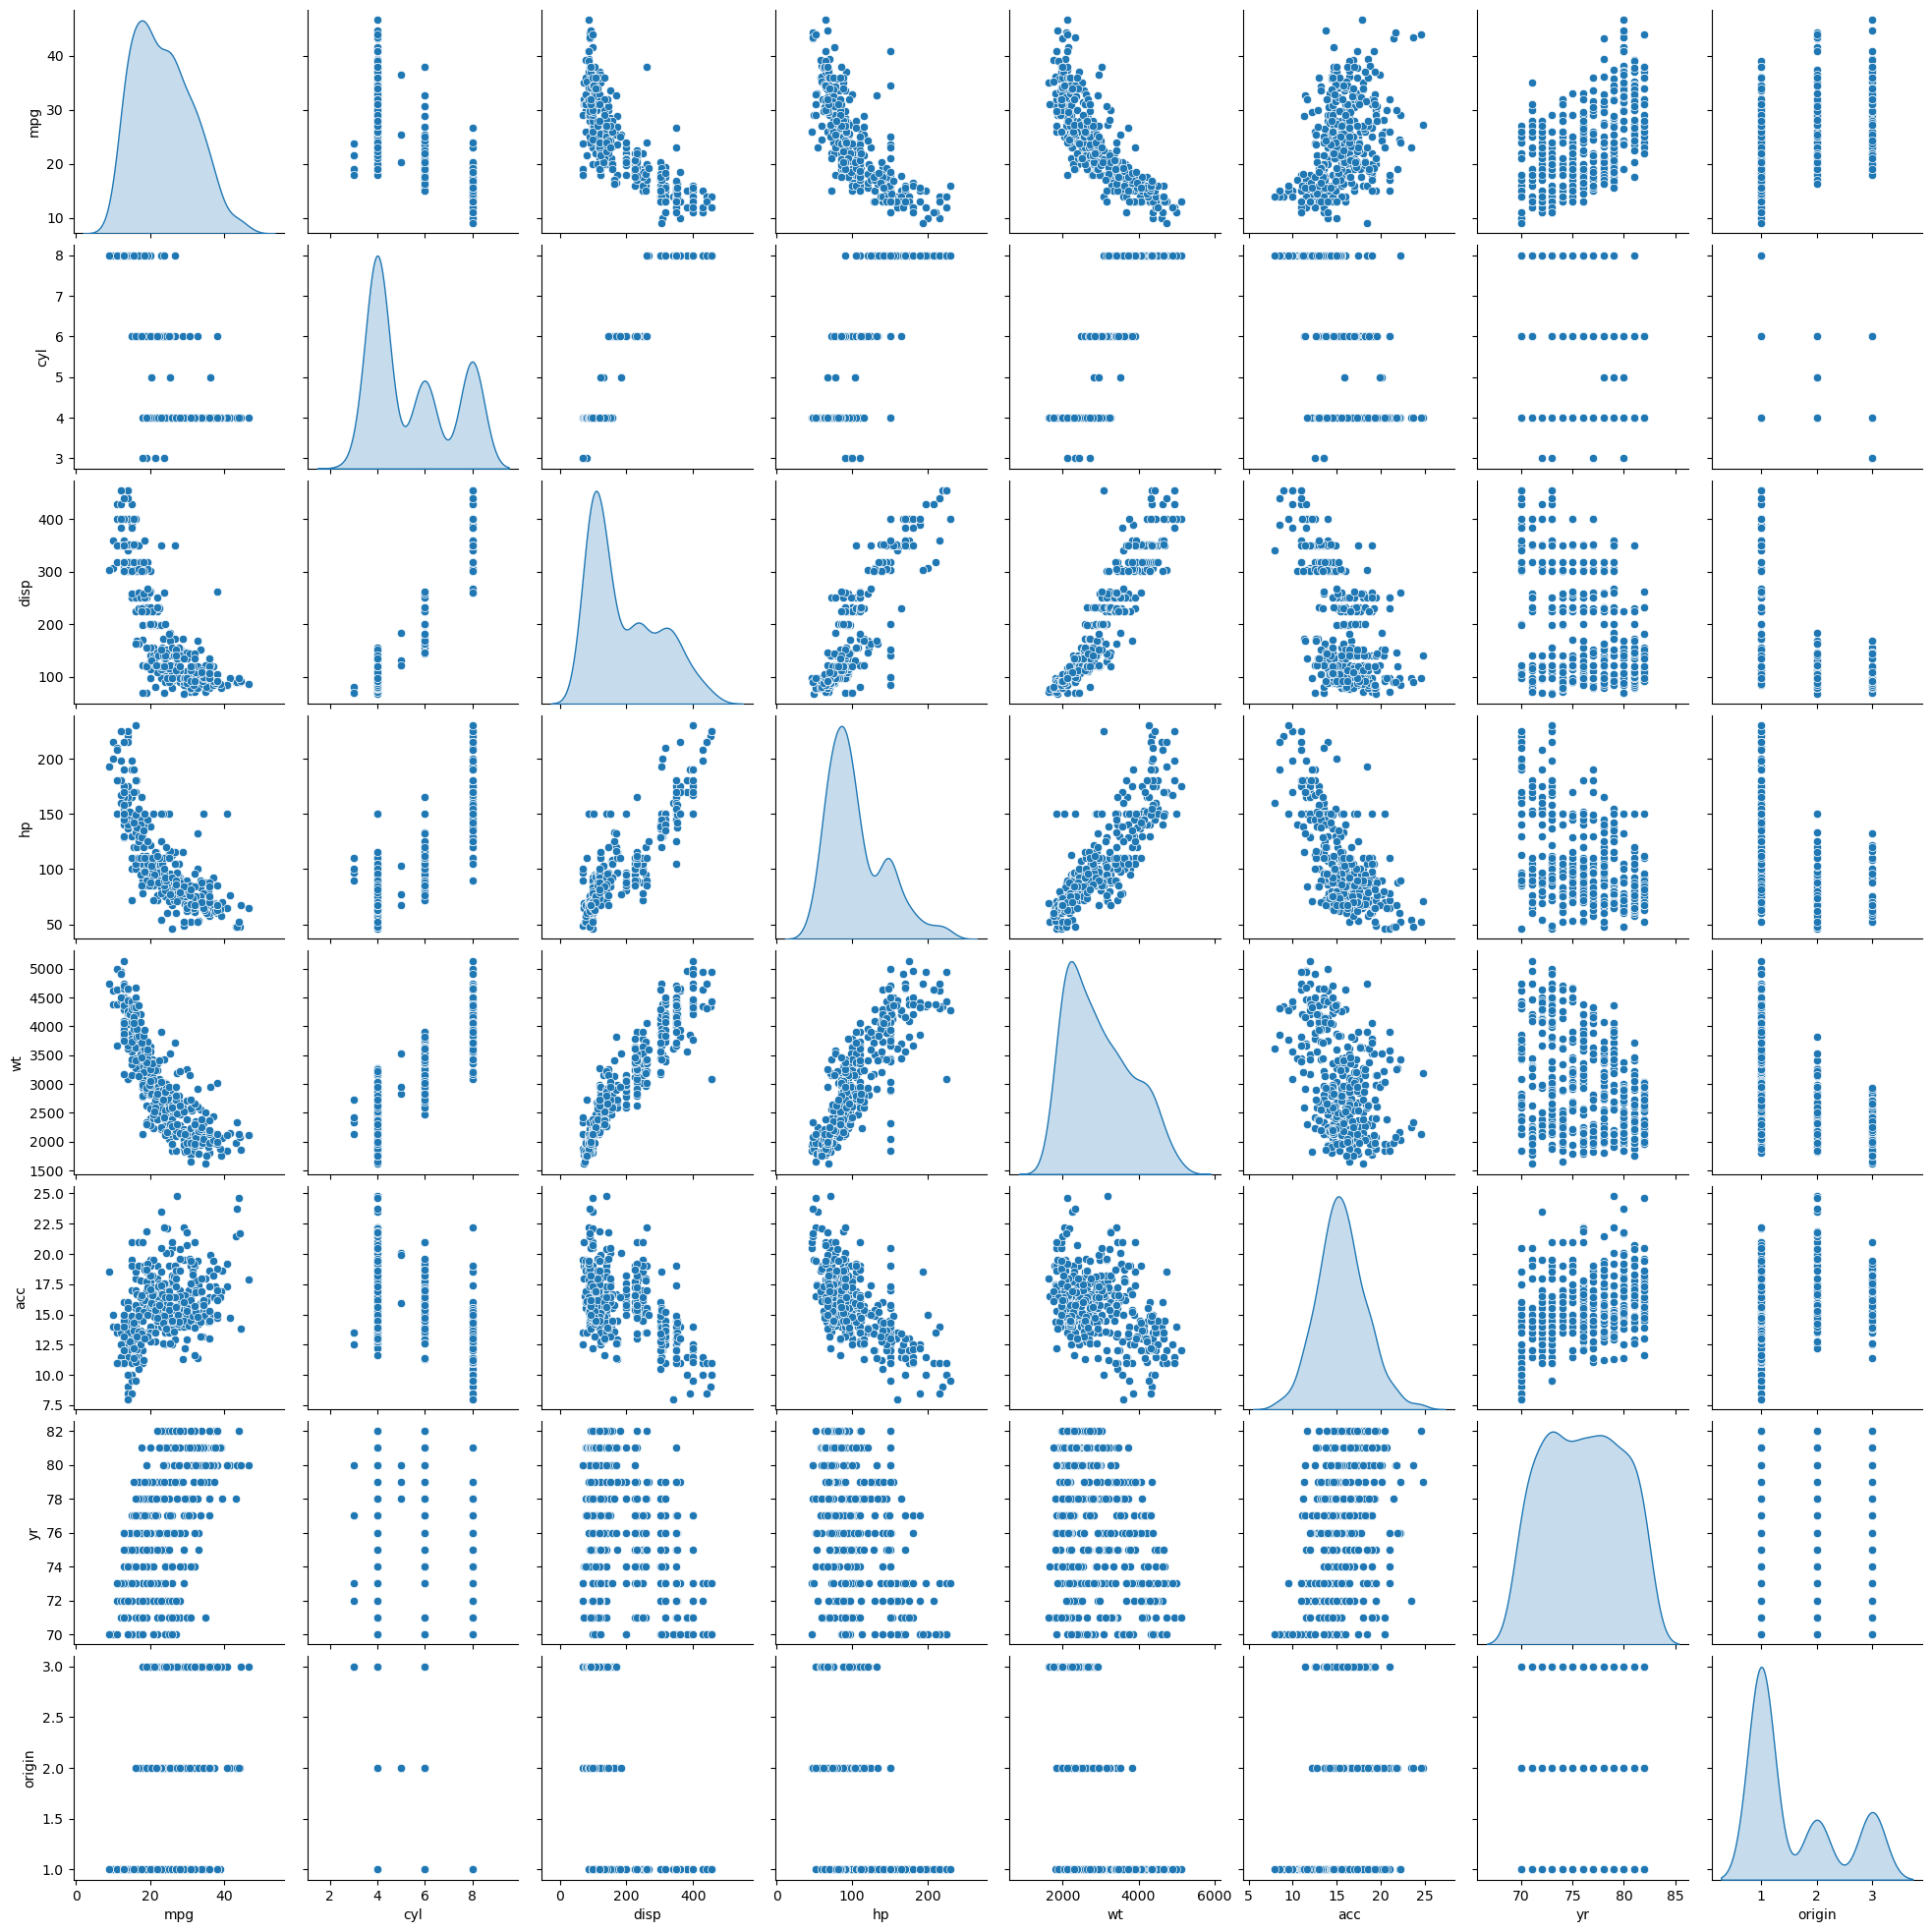

In [38]:
#pairplot
sns.pairplot(df,diag_kind ='kde')

- Pairplot confirms the linear relationship betwen above mentioned features
- Origin and Cyl have three peaks
- A few features are right-skewed
- Acc and mpg are normally distributed

## Checking for outliers using box plots and treat them if required.

<Axes: >

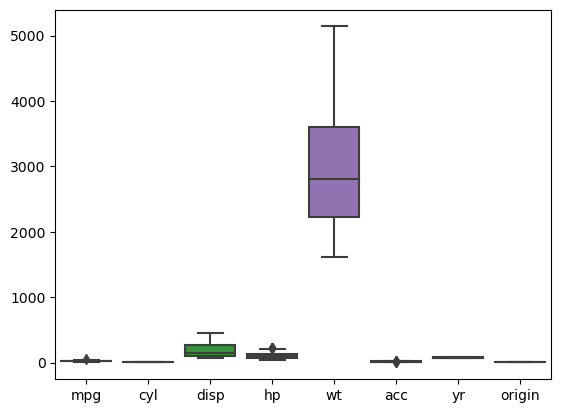

In [39]:
sns.boxplot(df)

In [40]:
df.shape

(398, 10)

In [41]:
# it checks for outliers and remove them from the data
def remove_outlier(dFrame, col_name):
    q1 = dFrame[col_name].quantile(0.25)
    q3 = dFrame[col_name].quantile(0.75)
    IQR = q3-q1 #Interquartile range
    lowVal  = q1 - 1.5*IQR
    highVal = q3 + 1.5*IQR
    frame_ret = dFrame.loc[(dFrame[col_name] > lowVal) & (dFrame[col_name] < highVal)]
    return frame_ret

In [42]:
for col in df.columns:
    if(col not in ['car_name','brand']):
        dff = remove_outlier(df, col)

In [43]:
dff.shape

(398, 10)

 - No outliers detected

## Identifying and separating the data into different clusters

In [44]:
dff.loc[:, 'mpg':'origin']

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [45]:
cols[:-1]

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler
#standardizing the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dff.loc[:, 'mpg':'origin']),columns=cols[:-1])


In [47]:
#Use Machine Learning algorithms like K Means
# We are dropping car name. We could try label encoder or some text preprocessing techniques to extract unique values
df_final = scaled_df
scaled_df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.644426,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.552280,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.163200,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.163200,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.903813,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.496876,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-1.378791,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.548753,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.678446,-0.408411,1.100822,1.621983,-0.715145


In [48]:
inertia=[]
for k in range(1,10):
  clusters=KMeans(n_clusters=k)
  clusters.fit(df_final)
  labels=clusters.labels_
  inertia.append(clusters.inertia_)

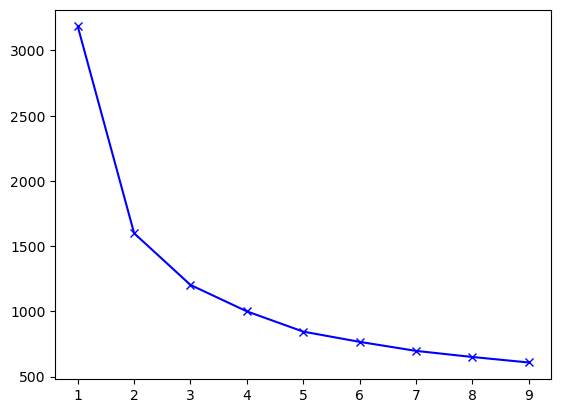

In [49]:
#elbow curve
plt.plot(range(1,10),inertia,'bx-')

In [50]:
# we can see the number of cluster lie between 3-5
kmeans = KMeans(n_clusters=3)

In [51]:
kmeans.fit(df_final)

KMeans(n_clusters=3)

In [52]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0,
       2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 0,

In [53]:
# adding the label column to the data frame
df_final['label'] = kmeans.labels_

In [54]:
df_final.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,label
0,-0.706439,1.498191,1.090604,0.644426,0.630870,-1.295498,-1.627426,-0.715145,1
1,-1.090751,1.498191,1.503514,1.552280,0.854333,-1.477038,-1.627426,-0.715145,1
2,-0.706439,1.498191,1.196232,1.163200,0.550470,-1.658577,-1.627426,-0.715145,1
3,-0.962647,1.498191,1.061796,1.163200,0.546923,-1.295498,-1.627426,-0.715145,1
4,-0.834543,1.498191,1.042591,0.903813,0.565841,-1.840117,-1.627426,-0.715145,1


In [55]:
pd.crosstab(df_final['label'],df_final['cyl'])

cyl,-1.444949,-0.856321,-0.267693,0.320935,1.498191
label,,,,,
0,0,55,2,76,4
1,0,0,0,1,99
2,4,149,1,7,0


In [56]:
pd.crosstab(df_final['label'],df_final['origin'])

origin,-0.715145,0.533222,1.781589
label,,,
0,125,12,0
1,100,0,0
2,24,58,79


 - We got somewhere around 3-4 optimal clusters
 - We can see that there are three types of origin in the data and hence it makes sense to conclude that there could be 3-4 types of clusters for these data

## using Model directly on the data

In [57]:
data_X = df_final.drop(['mpg', 'label'],axis=1)
data_y = df_final['mpg']
xtrain, xtest, ytrain, ytest = train_test_split(data_X,data_y,test_size = 0.3)

In [58]:
#LinearRegression model
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [59]:
# traing dataset accuracy
model.score(xtrain,ytrain)

0.8130945784851846

In [60]:
# testing dataset accuracy
model.score(xtest,ytest)

0.827260121203435

##  Let's build separate model for each cluster


In [61]:
# label =0
data1 = df_final[df_final.loc[:,'label'] == 0]

In [62]:
data1_X = data1.drop(['mpg', 'label'],axis=1)
data1_y = data1['mpg']
data1_xtrain, data1_xtest, data1_ytrain, data1_ytest = train_test_split(data1_X,data1_y,test_size = 0.3)

In [63]:
data1_xtrain.shape

(95, 7)

In [64]:
Lreg = LinearRegression()
Lreg.fit(data1_xtrain,data1_ytrain)

LinearRegression()

In [65]:
data1_ypred = Lreg.predict(data1_xtest)

In [66]:
# testing accuracy
Lreg.score(data1_xtest, data1_ytest)

0.599540588513978

In [67]:
# training accuracy
Lreg.score(data1_xtrain, data1_ytrain)

0.6509921870533869

In [68]:
#label = 1
data2 = df_final[df_final.loc[:,'label'] == 1]

In [69]:
data2_X = data2.drop(['mpg', 'label'],axis=1)
data2_y = data2['mpg']
data2_xtrain, data2_xtest, data2_ytrain, data2_ytest = train_test_split(data2_X,data2_y,test_size = 0.3)

In [70]:
data2_xtrain.shape

(70, 7)

In [71]:
Lreg2 = LinearRegression()
Lreg2.fit(data2_xtrain,data2_ytrain)

LinearRegression()

In [72]:
# testing accuracy
Lreg2.score(data2_xtest, data2_ytest)

0.4841042791260617

In [73]:
# training accuracy
Lreg2.score(data2_xtrain, data2_ytrain)

0.5604155863211232

In [74]:
#label =3 
data3 = df_final[df_final.loc[:,'label'] == 2]

In [75]:
data3_X = data3.drop(['mpg', 'label'],axis=1)
data3_y = data3['mpg']
data3_xtrain, data3_xtest, data3_ytrain, data3_ytest = train_test_split(data3_X,data3_y,test_size = 0.3)

In [76]:
Lreg3 = LinearRegression()
Lreg3.fit(data3_xtrain,data3_ytrain)

LinearRegression()

In [77]:
Lreg3.score(data3_xtest, data3_ytest)

0.6740941149889444

In [78]:
Lreg3.score(data3_xtrain,data3_ytrain)

0.6518681233716732

####  using different models for different clusters was it helpful in this case and how it will be different than using one single model without clustering?

- We can see that the original model is performing much better than the individual models
- Here, since there is high correlation between target and independent features we do not need cluster information to build a good regression model.
- We can use clustering to understand how different types are cars are influnced by various independent features
- Dataset size is quite less for individual models

## Using Agglomerative Clustering i.e. hierarchical clustering

In [79]:
from sklearn.preprocessing import StandardScaler
#standardizing the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dff.loc[:, 'mpg':'origin']),columns=cols[:-1])

In [80]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(scaled_df, 'average' )
c, coph_dists = cophenet(Z , pdist(scaled_df))

c

0.6963811174183852

In [81]:
Z = linkage(scaled_df, 'complete' )
c, coph_dists = cophenet(Z , pdist(scaled_df))

c

0.7297518571846641

In [82]:
Z = linkage(scaled_df, 'single' )
c, coph_dists = cophenet(Z , pdist(scaled_df))

c

0.5411366720118691

In [83]:
Z = linkage(scaled_df, 'ward' )
c, coph_dists = cophenet(Z , pdist(scaled_df))

c

0.6774135270211021

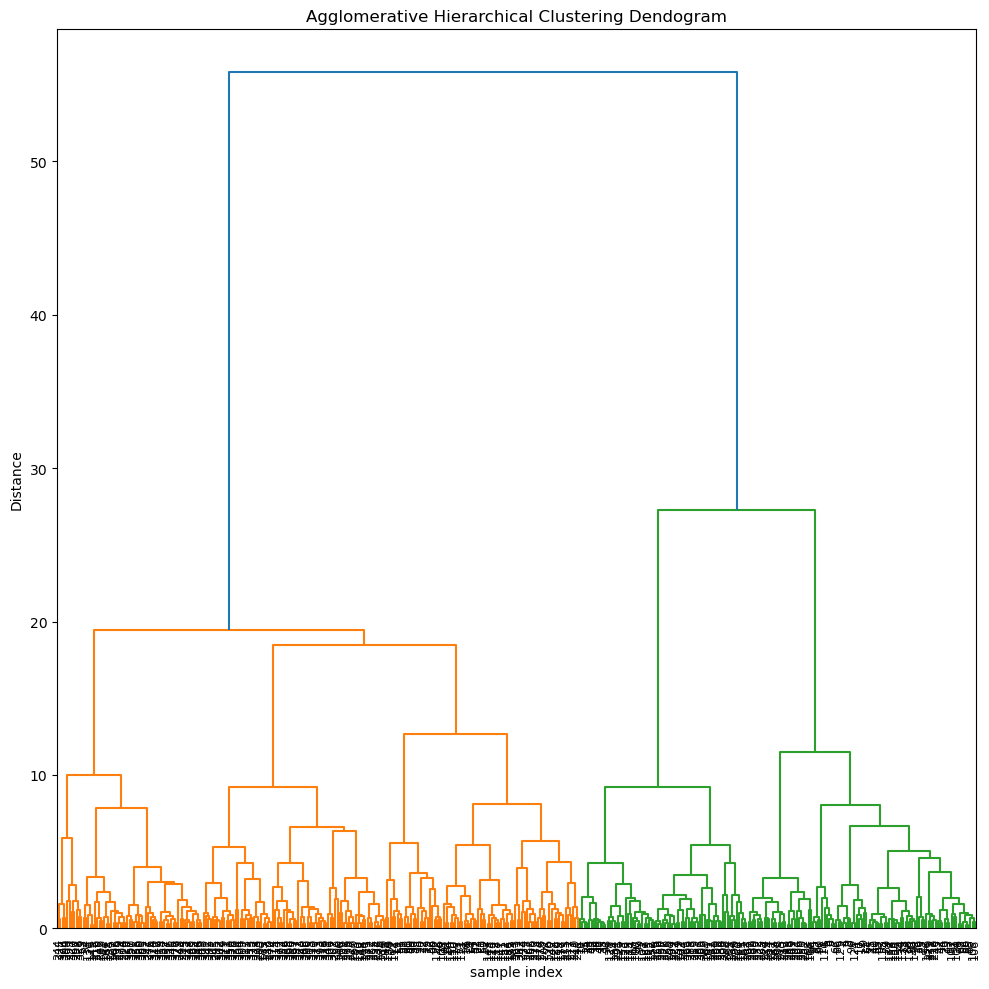

In [84]:
#dendogram plot we can also use Silhouette Score

plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

In [85]:
# complete distance is having better c value so we will use complete linkage for the model
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')

In [86]:
array=scaled_df.values
model.fit(array)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [87]:
scaled_df['labels']=model.labels_
scaled_df.groupby(["labels"]).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
labels,,,,,,,,
0,143,143,143,143,143,143,143,143
1,95,95,95,95,95,95,95,95
2,160,160,160,160,160,160,160,160


In [88]:
scaled_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,labels
0,-0.706439,1.498191,1.090604,0.644426,0.630870,-1.295498,-1.627426,-0.715145,1
1,-1.090751,1.498191,1.503514,1.552280,0.854333,-1.477038,-1.627426,-0.715145,1
2,-0.706439,1.498191,1.196232,1.163200,0.550470,-1.658577,-1.627426,-0.715145,1
3,-0.962647,1.498191,1.061796,1.163200,0.546923,-1.295498,-1.627426,-0.715145,1
4,-0.834543,1.498191,1.042591,0.903813,0.565841,-1.840117,-1.627426,-0.715145,1


In [89]:
#using separate models for 3 clusters
data1=scaled_df[scaled_df['labels']==0]
data2=scaled_df[scaled_df['labels']==1]
data3=scaled_df[scaled_df['labels']==2]

In [90]:
X = data1.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = data1['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print("training accuracy:",regression_model.score(X_train, y_train))
print("testing accuracy :",regression_model.score(X_test, y_test))

print("\n\n")
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

training accuracy: 0.6773115087345021
testing accuracy : 0.6730451275326299



The coefficient for cyl is 0.39790398383512454
The coefficient for disp is -0.16010719829575548
The coefficient for hp is -0.029516742170650097
The coefficient for wt is -0.867836408275269
The coefficient for acc is 0.118243928565755
The coefficient for yr is 0.5026485518589567
The coefficient for origin is -0.02051247381084816
The coefficient for labels is 0.0


In [91]:
X = data2.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = data2['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,train_size=0.7, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print("training accuracy:",regression_model.score(X_train, y_train))
print("testing accuracy :",regression_model.score(X_test, y_test))

print("\n\n")
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

training accuracy: 0.5634457678012479
testing accuracy : 0.554351754133407



The coefficient for cyl is 0.030795632413282887
The coefficient for disp is -0.03261340897229086
The coefficient for hp is -0.12448241648775625
The coefficient for wt is -0.12291215144095174
The coefficient for acc is -0.16407405265986358
The coefficient for yr is 0.15781268616733396
The coefficient for origin is -0.007698908103320697
The coefficient for labels is 0.0


In [92]:
X = data3.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = data3['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,train_size=0.7, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print("training accuracy:",regression_model.score(X_train, y_train))
print("testing accuracy :",regression_model.score(X_test, y_test))

print("\n\n")
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

training accuracy: 0.7436009125442163
testing accuracy : 0.9008699591150124



The coefficient for cyl is -0.013167137437170783
The coefficient for disp is -0.004577373720058557
The coefficient for hp is -0.140901730606509
The coefficient for wt is -0.690281093407993
The coefficient for acc is -0.041111625365766416
The coefficient for yr is 0.31515369459529824
The coefficient for origin is -0.12708879463570966
The coefficient for labels is 0.0
